Hipoteza: Zmienność wskaźnika BSP (Buy Sell Pressure) może służyć jako wczesny sygnał zmian w kierunku trendu na rynku giełdowym, wskazując na momenty, w których presja zakupowa lub sprzedażowa zaczyna dominować, co może prowadzić do przełamań w dotychczasowym kierunku rynku. Obserwacja zmian w wartościach BSP może pomóc w przewidywaniu punktów zwrotnych na rynku, czyli momentów, w których zmienia się ogólny sentyment i tym samym kierunek rynku


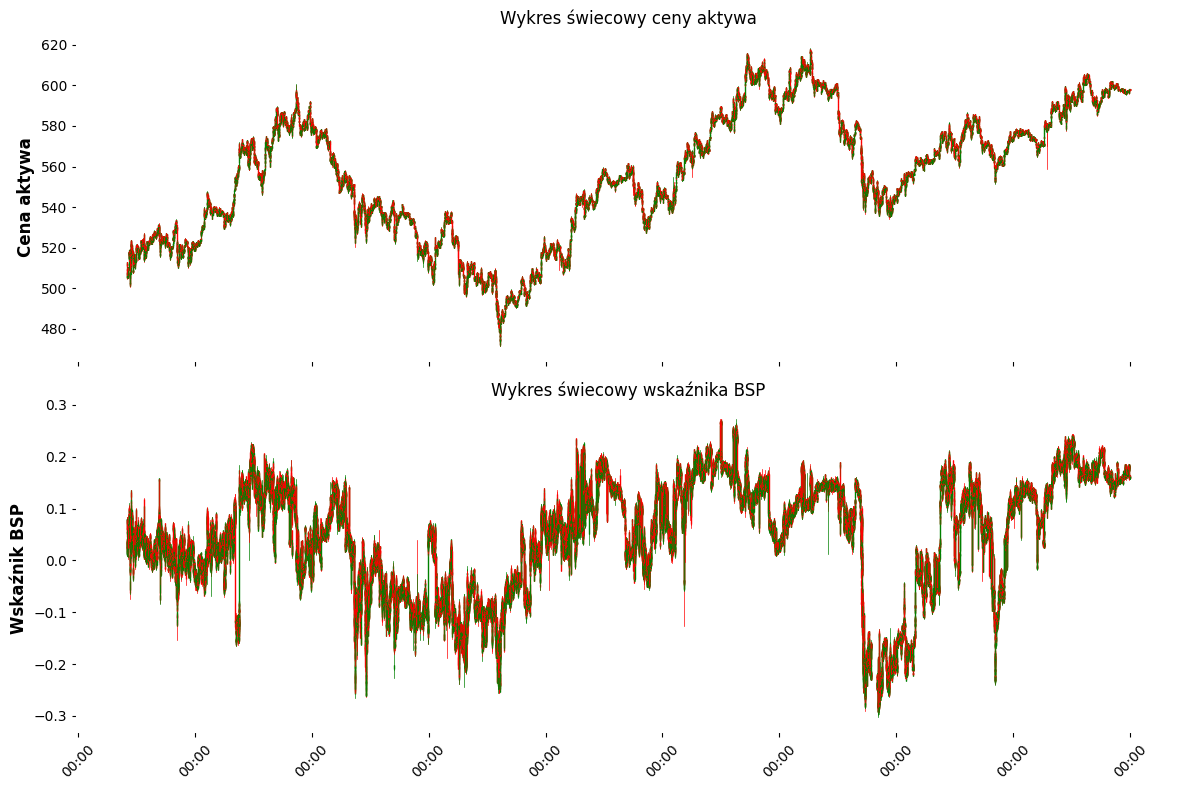

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.ticker as ticker

with open("../data/data-crypto-BNBUSDT-1m.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df["ts"] = pd.to_datetime(df["ts"], unit="s")
df["ts"] = df["ts"].map(mdates.date2num)

# Tworzenie wykresu
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Wykres świecowy dla ceny aktywa
ohlc = df[["ts", "o", "h", "l", "c"]].values
ax1 = axes[0]
candlestick_ohlc(ax1, ohlc, width=0.0005, colorup='g', colordown='r')
ax1.set_ylabel("Cena aktywa")
ax1.set_title("Wykres świecowy ceny aktywa")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.xaxis.set_major_locator(ticker.MaxNLocator(10))
ax1.grid()

# Wykres świecowy dla wskaźnika BSP
bsp_ohlc = df[["ts", "ob_10_p_o", "ob_10_p_h", "ob_10_p_l", "ob_10_p_c"]].values
ax2 = axes[1]
candlestick_ohlc(ax2, bsp_ohlc, width=0.0005, colorup='g', colordown='r')
ax2.set_ylabel("Wskaźnik BSP")
ax2.set_title("Wykres świecowy wskaźnika BSP")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.xaxis.set_major_locator(ticker.MaxNLocator(10))
ax2.grid()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

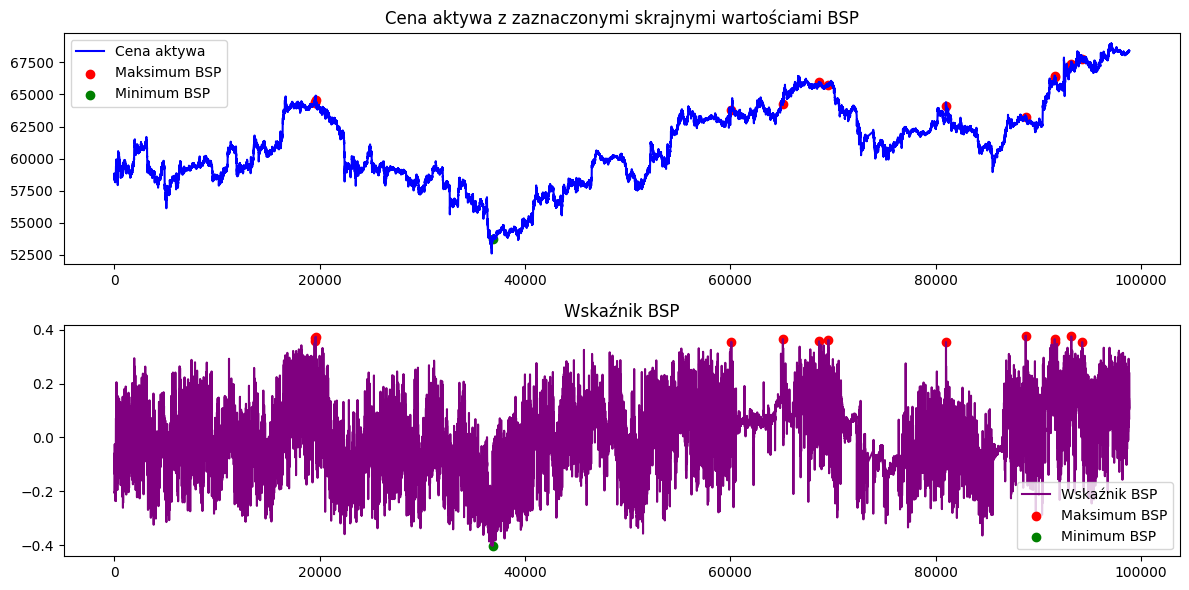

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Parametry analizy
BSP_THRESHOLD = 0.35  # Próg wskaźnika BSP do analizy
LOOKAHEAD_STEPS = 10   # Ilość świec po przekroczeniu progu do analizy

DATA_DIR = "../data"
files = [f for f in os.listdir(DATA_DIR) if f.endswith(".json")]

def load_data(file_path):
    with open(file_path, "r") as f:
        return json.load(f)

data = load_data("../data/data-crypto-BTCUSDT-1m.json")
df = pd.DataFrame(data)

df["c"] = pd.to_numeric(df["c"], errors='coerce')
df["ob_10_p_c"] = pd.to_numeric(df["ob_10_p_c"], errors='coerce')

df.dropna(inplace=True)

# Analiza przekroczenia progu BSP (maksimum)
threshold_crossings_max = df[df['ob_10_p_c'] > BSP_THRESHOLD]

# Analiza przekroczenia minimum BSP w danym zakresie
BSP_MIN_RANGE = df['ob_10_p_c'].min()
threshold_crossings_min = df[df['ob_10_p_c'] <= BSP_MIN_RANGE]

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['c'], label="Cena aktywa", color='blue')
plt.scatter(threshold_crossings_max.index, threshold_crossings_max['c'], color='red', label='Maksimum BSP', marker='o')
plt.scatter(threshold_crossings_min.index, threshold_crossings_min['c'], color='green', label='Minimum BSP', marker='o')
plt.legend()
plt.title("Cena aktywa z zaznaczonymi skrajnymi wartościami BSP")

plt.subplot(2, 1, 2)
plt.plot(df.index, df['ob_10_p_c'], label="Wskaźnik BSP", color='purple')
plt.scatter(threshold_crossings_max.index, threshold_crossings_max['ob_10_p_c'], color='red', label='Maksimum BSP', marker='o')
plt.scatter(threshold_crossings_min.index, threshold_crossings_min['ob_10_p_c'], color='green', label='Minimum BSP', marker='o')
plt.legend()
plt.title("Wskaźnik BSP")

plt.tight_layout()
plt.show()



Wykres przedstawia momenty w których wskaźnik BSP wskazuje relatywnie wysoką wartość która może wskazywać na odwrócenie aktualnego trendu